# FFT : O(nlogn) 

In [2]:
"""
Notebook for streaming data from a microphone in realtime

audio is captured using pyaudio
then converted from binary data to ints using struct
then displayed using matplotlib

scipy.fftpack computes the FFT

if you don't have pyaudio, then run

>>> pip install pyaudio

note: with 2048 samples per chunk, I'm getting 20FPS
when also running the spectrum, its about 15FPS
"""

import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

# to display in separate Tk window
%matplotlib tk

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second

In [3]:
# create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create semilogx line for spectrum
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

# Signal range is -32k to 32k
# limiting amplitude to +/- 4k
AMPLITUDE_LIMIT = 4096

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)    

    data_np = np.frombuffer(data, dtype='h')
    
    line.set_ydata(data_np)
    
    # compute FFT and update line
    yf = fft(data_np)
    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (512 * CHUNK))
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break

stream started


KeyboardInterrupt: 

# Updated Graph

In [3]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second


stream started


KeyboardInterrupt: 

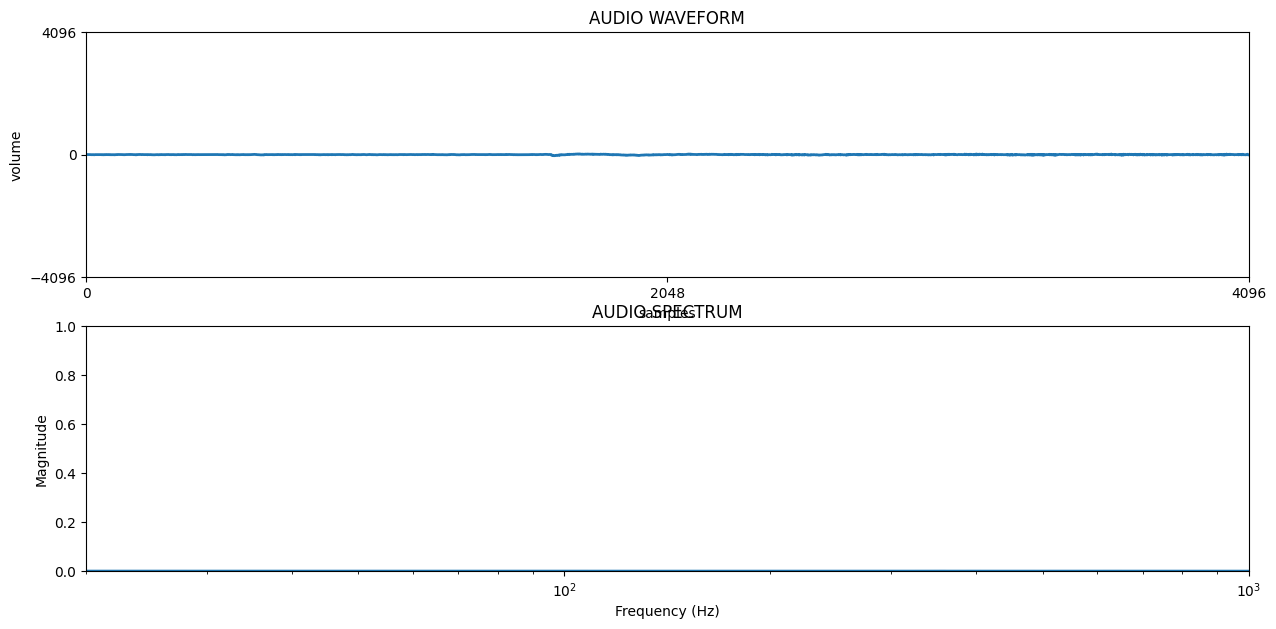

In [5]:
# create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, 1000, CHUNK)     # frequencies (0-1000 Hz)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# create semilogx line for spectrum with magnitude between 0 and 1
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), '-', lw=2)

# Signal range is -32k to 32k
# limiting amplitude to +/- 4k
AMPLITUDE_LIMIT = 4096

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# format spectrum axes
ax2.set_xlim(20, 1000)  # Changed to match new frequency range
ax2.set_ylim(0, 1)     # Set magnitude between 0 and 1
ax2.set_title('AUDIO SPECTRUM')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

# Adjust the sleep time to slow down the graph update
import time as t

while True:
    # binary data
    data = stream.read(CHUNK)
    
    data_np = np.frombuffer(data, dtype='h')
    line.set_ydata(data_np)
    
    # compute FFT and update line
    yf = fft(data_np)
    
    # Normalize magnitude between 0 and 1
    magnitude = np.abs(yf[0:CHUNK]) / (512 * CHUNK)
    magnitude = np.clip(magnitude * 0.2, 0, 1)  # Scale to 0-1 range
    
    line_fft.set_ydata(magnitude)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
        # Add a small delay to slow down the graph update
        t.sleep(0.005)  # Adjust this value to control graph speed
        
    except TclError:
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break

# 3D

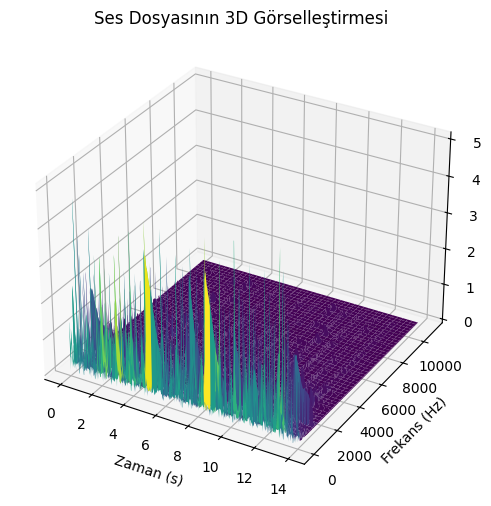

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ses dosyasını parça parça yükleyelim (.flac uzantılı dosya)
file_path = 'piano_c_major_scale.wav'  # Buraya .flac ses dosyanızın yolunu yazın

# Örnekleme oranını azaltarak daha küçük boyutlu bir veri yükleyelim (örneğin 22.05 kHz)
y, sr = librosa.load(file_path, sr=22050, offset=0.0, duration=60.0)  # 60 saniyelik kısmı yükleyelim

# Kısa Zamanlı Fourier Dönüşümü (STFT) uygulayalım
D = np.abs(librosa.stft(y))

# Zaman ve frekans eksenlerini hesaplayalım
times = librosa.times_like(D, sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)

# 3D grafik çizimi
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Z ekseni için genlikleri normalize edelim
amplitudes = np.log1p(D)

# Zaman, frekans ve genlik eksenlerini hazırlayalım
X, Y = np.meshgrid(times, frequencies)
Z = amplitudes

# Grafik çizelim
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Zaman (s)')
ax.set_ylabel('Frekans (Hz)')
ax.set_zlabel('Genlik (dB)')
ax.set_title('Ses Dosyasının 3D Görselleştirmesi')

plt.show()


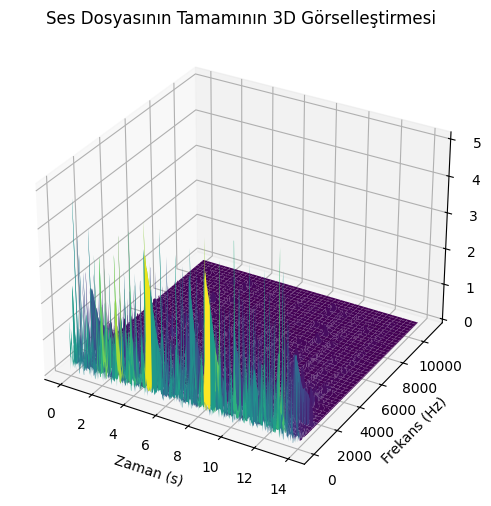

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ses dosyasını yükleyelim (.wav uzantılı dosya)
file_path = 'piano_c_major_scale.wav'  # Ses dosyanızın yolunu buraya yazın

# Ses dosyasının tamamını yükle
y, sr = librosa.load(file_path, sr=22050)  # Örnekleme oranı 22.05 kHz

# Kısa Zamanlı Fourier Dönüşümü (STFT) uygulayalım
D = np.abs(librosa.stft(y))

# Zaman ve frekans eksenlerini hesaplayalım
times = librosa.times_like(D, sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)

# 3D grafik çizimi
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Z ekseni için genlikleri normalize edelim
amplitudes = np.log1p(D)

# Zaman, frekans ve genlik eksenlerini hazırlayalım
X, Y = np.meshgrid(times, frequencies)
Z = amplitudes

# Grafik çizelim
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Zaman (s)')
ax.set_ylabel('Frekans (Hz)')
ax.set_zlabel('Genlik (dB)')
ax.set_title('Ses Dosyasının Tamamının 3D Görselleştirmesi')

plt.show()


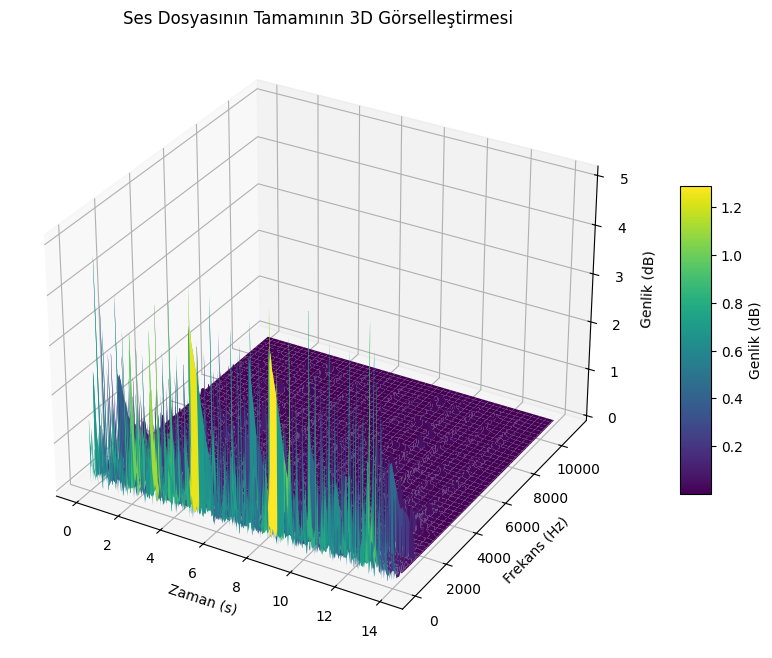

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ses dosyasını yükleyelim
file_path = 'piano_c_major_scale.wav'  # Ses dosyasının yolu
y, sr = librosa.load(file_path)

# Kısa Zamanlı Fourier Dönüşümü (STFT) uygulayalım
D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))  # Daha net görselleştirme için hop_length ayarlandı

# Zaman ve frekans eksenlerini hesaplayalım
times = librosa.frames_to_time(range(D.shape[1]), sr=sr, hop_length=512, n_fft=2048)
frequencies = librosa.fft_frequencies(sr=sr)

# Z ekseni için genlikleri normalize edelim
amplitudes = np.log1p(D)  # Logaritmik ölçek

# Zaman, frekans ve genlik eksenlerini hazırlayalım
X, Y = np.meshgrid(times, frequencies)
Z = amplitudes

# 3D grafik çizimi
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Yüzey çizimi
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Grafik ayarları
ax.set_xlabel('Zaman (s)')
ax.set_ylabel('Frekans (Hz)')
ax.set_zlabel('Genlik (dB)')
ax.set_title('Ses Dosyasının Tamamının 3D Görselleştirmesi')

# Renk barı ekleyelim
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Genlik (dB)')

plt.show()


# New

In [2]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

%matplotlib tk

# Constants
CHUNK = 1024 * 2             # Samples per frame
FORMAT = pyaudio.paInt16     # Audio format (bytes per sample?)
CHANNELS = 1                 # Single channel for microphone
RATE = 44100                 # Samples per second

# Create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# PyAudio class instance
p = pyaudio.PyAudio()

# Stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# Variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # Samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # Frequencies (spectrum)

# Create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# Create semilogx line for spectrum
line_fft_piano, = ax2.semilogx(xf, np.random.rand(CHUNK), 'g-', lw=2, label="Piano Notes")
line_fft_voice, = ax2.semilogx(xf, np.random.rand(CHUNK), 'b-', lw=2, label="Human Notes")

# Signal range is -32k to 32k
AMPLITUDE_LIMIT = 4096

# Format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# Format spectrum axes
ax2.set_xlim(20, RATE / 2)
ax2.set_title('FREQUENCY SPECTRUM')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.legend()

print('stream started')

# For measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    # Binary data
    data = stream.read(CHUNK)
    data_np = np.frombuffer(data, dtype='h')
    
    # Update waveform
    line.set_ydata(data_np)
    
    # Compute FFT
    yf = fft(data_np)
    spectrum = np.abs(yf[0:CHUNK]) / (512 * CHUNK)
    
    # Separate piano and human notes
    piano_notes = np.zeros_like(spectrum)
    human_notes = np.zeros_like(spectrum)
    
    piano_notes[(xf >= 27.5) & (xf <= 4186)] = spectrum[(xf >= 27.5) & (xf <= 4186)]
    human_notes[(xf >= 85) & (xf <= 1100)] = spectrum[(xf >= 85) & (xf <= 1100)]
    
    # Update spectrum lines
    line_fft_piano.set_ydata(piano_notes)
    line_fft_voice.set_ydata(human_notes)
    
    # Update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
    except TclError:
        # Calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break


stream started


KeyboardInterrupt: 

In [2]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

%matplotlib tk

# Constants
CHUNK = 1024 * 2             # Samples per frame
FORMAT = pyaudio.paInt16     # Audio format (bytes per sample?)
CHANNELS = 1                 # Single channel for microphone
RATE = 44100                 # Samples per second

# Create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# PyAudio class instance
p = pyaudio.PyAudio()

# Stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# Variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # Samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # Frequencies (spectrum)

# Create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# Create semilogx line for spectrum
line_fft_piano, = ax2.semilogx(xf, np.random.rand(CHUNK), 'g-', lw=2, label="Piano Notes")
line_fft_voice, = ax2.semilogx(xf, np.random.rand(CHUNK), 'b-', lw=2, label="Human Notes")

# Signal range is -32k to 32k
AMPLITUDE_LIMIT = 4096

# Format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# Format spectrum axes
ax2.set_xlim(0, 1000)  # Frequency range: 0 to 1000 Hz
ax2.set_ylim(0, 1)     # Amplitude range: 0 to 1
ax2.set_title('FREQUENCY SPECTRUM')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.legend()
plt.setp(ax2, xticks=np.arange(0, 1100, 100), yticks=np.arange(0, 1.2, 0.2))

print('stream started')

# For measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    # Binary data
    data = stream.read(CHUNK)
    data_np = np.frombuffer(data, dtype='h')
    
    # Update waveform
    line.set_ydata(data_np)
    
    # Compute FFT
    yf = fft(data_np)
    spectrum = np.abs(yf[0:CHUNK]) / (512 * CHUNK)
    
    # Separate piano and human notes
    piano_notes = np.zeros_like(spectrum)
    human_notes = np.zeros_like(spectrum)
    
    piano_notes[(xf >= 27.5) & (xf <= 4186)] = spectrum[(xf >= 27.5) & (xf <= 4186)]
    human_notes[(xf >= 85) & (xf <= 1100)] = spectrum[(xf >= 85) & (xf <= 1100)]
    
    # Update spectrum lines
    line_fft_piano.set_ydata(piano_notes)
    line_fft_voice.set_ydata(human_notes)
    
    # Update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
    except TclError:
        # Calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break


C:\Users\linux\AppData\Local\Temp\ipykernel_1828\3502636023.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0, 1000)  # Frequency range: 0 to 1000 Hz


stream started


KeyboardInterrupt: 

In [4]:
import pyaudio 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

%matplotlib tk

# Constants
CHUNK = 2048                # FFT pencere boyutu (önceki koddaki gibi)
FORMAT = pyaudio.paInt16    # Ses formatı
CHANNELS = 1                # Tek kanal (mono)
RATE = 44100                # Örnekleme hızı (Hz)
FFT_WINDOW_SECONDS = CHUNK / RATE  # FFT pencere süresi

# Create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# PyAudio class instance
p = pyaudio.PyAudio()

# Stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# Variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # Waveform samples
xf = np.linspace(0, RATE, CHUNK)     # Frequencies for FFT

# Create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# Create semilogx line for spectrum
line_fft_piano, = ax2.semilogx(xf, np.random.rand(CHUNK), 'g-', lw=2, label="Piano Notes")
line_fft_voice, = ax2.semilogx(xf, np.random.rand(CHUNK), 'b-', lw=2, label="Human Notes")

# Signal range is -32k to 32k
AMPLITUDE_LIMIT = 32768

# Format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitude')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[-AMPLITUDE_LIMIT, 0, AMPLITUDE_LIMIT])

# Format spectrum axes
ax2.set_xlim(20, RATE / 2)
ax2.set_title('FREQUENCY SPECTRUM')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.legend()

print('Stream started')

# For measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    # Binary data
    data = stream.read(CHUNK)
    data_np = np.frombuffer(data, dtype='h')

    # Update waveform
    line.set_ydata(data_np)

    # Compute FFT
    yf = fft(data_np)
    spectrum = np.abs(yf[:CHUNK]) / CHUNK  # Normalize FFT output

    # Separate piano and human notes
    piano_notes = np.zeros_like(spectrum)
    human_notes = np.zeros_like(spectrum)

    piano_notes[(xf >= 27.5) & (xf <= 4186)] = spectrum[(xf >= 27.5) & (xf <= 4186)]
    human_notes[(xf >= 85) & (xf <= 1100)] = spectrum[(xf >= 85) & (xf <= 1100)]

    # Update spectrum lines
    line_fft_piano.set_ydata(piano_notes)
    line_fft_voice.set_ydata(human_notes)

    # Update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
    except TclError:
        # Calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        print('Stream stopped')
        print(f'Average frame rate = {frame_rate:.0f} FPS')
        break


Stream started


KeyboardInterrupt: 

In [5]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
from tkinter import TclError

# %matplotlib tk  # Terminalde çalıştırıyorsanız bu satırı yorumdan çıkarın.

# Constants
CHUNK = 1024 * 2             # Samples per frame
FORMAT = pyaudio.paInt16     # Audio format (bytes per sample?)
CHANNELS = 1                 # Single channel for microphone
RATE = 44100                 # Samples per second

# Create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))

# PyAudio class instance
p = pyaudio.PyAudio()

# Stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# Variable for plotting
x = np.arange(0, 2 * CHUNK, 2)  # Samples (waveform)
xf = np.linspace(0, RATE / 2, CHUNK // 2)  # Frequencies (spectrum)

# Frekans sınırları (0-1000 Hz arasını seçiyoruz)
freq_limit = 1000
freq_indices = xf <= freq_limit
xf_limited = xf[freq_indices]

# Create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), '-', lw=2)

# Create line for spectrum
line_fft, = ax2.plot(xf_limited, np.random.rand(len(xf_limited)), '-', lw=2)

# Signal range is normalized
AMPLITUDE_LIMIT = 1.0

# Format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(-AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
ax1.set_xlim(0, 2 * CHUNK)

# Format spectrum axes
ax2.set_xlim(0, freq_limit)  # Frekans sınırları
ax2.set_ylim(0, 1)          # Amplitude sınırları
ax2.set_xticks(np.arange(0, freq_limit + 1, 200))
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax2.set_title('FREQUENCY SPECTRUM')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Normalized Amplitude')

print('stream started')

# For measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    try:
        # Binary data
        data = stream.read(CHUNK, exception_on_overflow=False)
        data_np = np.frombuffer(data, dtype='h') / 32768.0  # Normalize -1 to 1
        
        # Update waveform
        line.set_ydata(data_np)
        
        # Compute FFT
        yf = fft(data_np)
        spectrum = np.abs(yf[:CHUNK // 2])
        spectrum = spectrum / np.max(spectrum)  # Normalize to 0-1
        
        # Sadece 0-1000 Hz arasını seç
        spectrum_limited = spectrum[freq_indices]
        
        # Update spectrum line
        line_fft.set_ydata(spectrum_limited)
        
        # Update figure canvas
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
    
    except TclError:
        # Calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break


stream started


KeyboardInterrupt: 